In [ ]:
#importing all the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules

#Class for performing Data Analysis
class DataAnalysis:
    def __init__(self, dataset_path):
        self.data = pd.read_excel(dataset_path)


    def perform_analysis(self):
        self.display_data()
        self.calculate_summary_statistics()
        self.plot_histogram('SystolicBP', 'Distribution of Systolic BP')
        self.plot_scatter('DiastolicBP', 'SystolicBP', 'Scatter Plot: Systolic BP vs. Diastolic BP')
        self.calculate_correlation_matrix()

    def display_data(self):
        # Display the dataset
        print(self.data.head())

    def calculate_summary_statistics(self):
        # Calculate summary statistics
        summary_stats = self.data.describe()
        print(summary_stats)

    def plot_histogram(self, variable, title):
        # Histogram
        plt.hist(self.data[variable], bins=10, edgecolor='black')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
        plt.title(title)
        plt.savefig('my_plot.png', dpi=300)
        plt.show()


    def plot_scatter(self, x_variable, y_variable, title):
        # Scatter plot
        sns.scatterplot(data=self.data, x=x_variable, y=y_variable)
        plt.xlabel(x_variable)
        plt.ylabel(y_variable)
        plt.title(title)
        plt.savefig('my_plot2.png', dpi=300)
        plt.show()

    def calculate_correlation_matrix(self):
        # Correlation matrix
        correlation_matrix = self.data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.savefig('my_plot3.png', dpi=300)
        plt.show()
    def find_clusters(self):
        # Select the feature for clustering
        X = self.data[['SystolicBP']]

        # Standardize the feature
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Apply K-means clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        kmeans.fit(X_scaled)

        # Add cluster labels to the dataset
        self.data['Cluster'] = kmeans.labels_

        # Print the clusters
        clusters = self.data.groupby('Cluster')['SystolicBP'].mean()
        print(clusters)
    def calculate_age_systolicBP_correlation(self):
        # Calculate the correlation between age and Systolic BP
        correlation = self.data['Age'].corr(self.data['SystolicBP'])
        print("Correlation between Age and Systolic BP:", correlation)

#Building a linear model
class LinearModel:
    def __init__(self, dataset):
        self.data = dataset

    def fit_linear_model(self):
        X = self.data[['Age', 'BodyTemp', 'HeartRate']]
        y = self.data['SystolicBP']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        model = LinearRegression()
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        mean_square_error=mean_squared_error(pred,y_test)
        print(f'mean_square_error: {mean_square_error}')
        mean_absolute_error1=mean_absolute_error(pred,y_test)
        print(f'mean_absolute_error: {mean_absolute_error1}')


#PCA for reducing variable
class PCAAnalysis:
    def __init__(self, dataset):
        self.data = dataset

    def apply_pca(self):
        scaler = StandardScaler()
        policy_cat=['RiskLevel']
        for col in policy_cat:
          lr = LabelEncoder()
          self.data[col] = lr.fit_transform(self.data[col])
        scaled_data = scaler.fit_transform(self.data)

        pca = PCA()
        pca.fit(scaled_data)

        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_explained_variance = np.cumsum(explained_variance_ratio)

        self.plot_explained_variance_ratio(explained_variance_ratio)
        self.plot_cumulative_explained_variance(cumulative_explained_variance)

    def plot_explained_variance_ratio(self, explained_variance_ratio):
        # Plot explained variance ratio
        plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance Ratio by Principal Component')
        plt.savefig('my_plot6.png', dpi=300)
        plt.show()


    def plot_cumulative_explained_variance(self, cumulative_explained_variance):
        # Plot cumulative explained variance
        plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
        plt.xlabel('Principal Component')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Cumulative Explained Variance by Principal Component')
        plt.savefig('cumulative.png', dpi=300)
        plt.show()


class AgeGroup:
    def __init__(self, dataset):
        self.data = dataset

    def age_group(self):
        # Define age intervals
        age_intervals = pd.cut(self.data['Age'], bins=[0, 20, 30, 40, 50, 60, 100])

        # Calculate mean heart rate for each age group
        mean_heart_rate = self.data.groupby(age_intervals)['HeartRate'].mean()

        # Plot the relationship between age and mean heart rate
        plt.bar(mean_heart_rate.index.astype(str), mean_heart_rate)
        plt.xlabel('Age Group')
        plt.ylabel('Mean Heart Rate')
        plt.title('Relationship between Age and Mean Heart Rate')
        plt.savefig('agegroup.png', dpi=300)
        plt.show()


In [ ]:
from apyori import apriori

## Performing Analysis

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    9

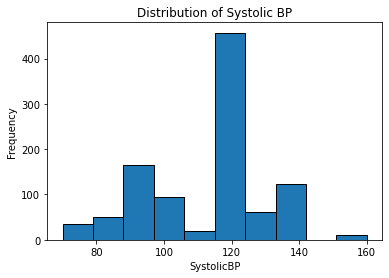

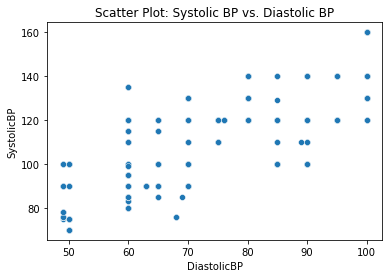

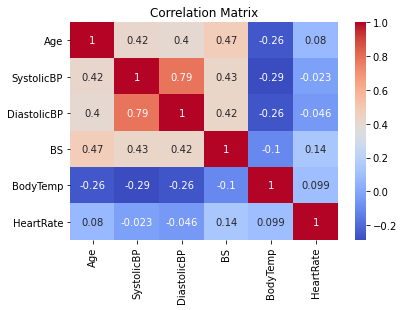

In [ ]:
data_analysis = DataAnalysis('mhs.xls')
data_analysis.perform_analysis()

## Model Building and Evaluation

In [ ]:
linear_model = LinearModel(data_analysis.data)
linear_model.fit_linear_model()

mean_square_error: 292.0594543981
mean_absolute_error: 14.079227829461217


## PCA Analysis

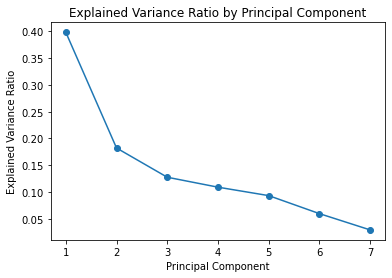

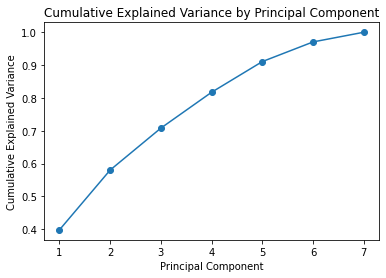

In [ ]:
pca_analysis = PCAAnalysis(data_analysis.data)
pca_analysis.apply_pca()

## AgeGrouping

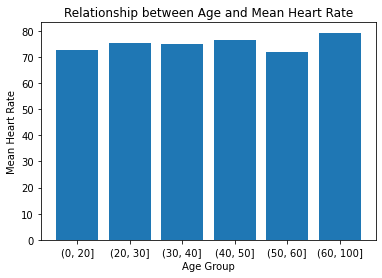

In [ ]:
age_group = AgeGroup(data_analysis.data)
age_group.age_group()

## Clustering of patient

In [ ]:
data_analysis.find_clusters()

Cluster
0    137.804124
1     90.578488
2    119.516807
Name: SystolicBP, dtype: float64


## Age correlation with SystolicBP

In [ ]:
data_analysis.calculate_age_systolicBP_correlation()

Correlation between Age and Systolic BP: 0.4160454479747329


## Exploring relationship between systolicBP and diastolicBP

We'll first define a general function and then use the function to calculate the metric for each level

In [ ]:
#Defining a function to calculate the metric for each level of the BPs
def mining(SystolicLevel,DiastolicLevel):
  # create binary values for high systolic and diastolic blood pressure
  bp_df['HighSystolicBP'] = SystolicLevel#bp_df['SystolicBP'].apply(lambda x: 1 if x >= 140 else 0)
  bp_df['HighDiastolicBP'] = DiastolicLevel#bp_df['DiastolicBP'].apply(lambda x: 1 if x >= 90 else 0)

  # calculate frequent itemsets with a minimum support of 0.1
  frequent_itemsets = apriori(bp_df[['HighDiastolicBP','HighSystolicBP']], min_support=0.1, use_colnames=True)

  # generate association rules with a minimum lift of 1
  rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

  # filter rules for high systolic and diastolic blood pressure
  high_bp_rules = rules[(rules['antecedents'].apply(lambda x: 'HighSystolicBP' in x) & rules['consequents'].apply(lambda x: 'HighDiastolicBP' in x))]

  # calculate support, confidence, conviction, and lift for high systolic and diastolic blood pressure
  support = high_bp_rules['support'].values[0]
  confidence = high_bp_rules['confidence'].values[0]
  conviction = high_bp_rules['conviction'].values[0]
  lift = high_bp_rules['lift'].values[0]

  print("Support:", support)
  print("Confidence:", confidence)
  print("Conviction:", conviction)
  print("Lift:", lift)

**highSystolicBP/highDiastolicBP**

In [ ]:
# create a dataframe with only systolic and diastolic blood pressure columns
bp_df = data_analysis.data[['SystolicBP', 'DiastolicBP']]
bp_df['HighSystolicBP'] = bp_df['SystolicBP'].apply(lambda x: 1 if x >= 140 else 0)
bp_df['HighDiastolicBP'] =bp_df['DiastolicBP'].apply(lambda x: 1 if x >= 90 else 0)
mining(bp_df['HighSystolicBP'],bp_df['HighDiastolicBP'])

**normalSystolicBP/normalDiastolicBP**

In [ ]:
bp_df['NormalSystolicBP'] = bp_df['SystolicBP'].apply(lambda x: 1 if x in range(120,140) else 0)
bp_df['NormalDiastolicBP'] = bp_df['DiastolicBP'].apply(lambda x: 1 if x in range(80,90) else 0)
mining(bp_df['NormalSystolicBP'],bp_df['NormalDiastolicBP'])

NameError: name 'mining' is not defined

**lowSystolicBP/lowDiastoliBP**

In [ ]:
bp_df['LowSystolicBP'] = bp_df['SystolicBP'].apply(lambda x: 1 if x in range(69,120) else 0)
bp_df['LowDiastolicBP'] = bp_df['DiastolicBP'].apply(lambda x: 1 if x in range(40,80) else 0)
mining(bp_df['LowSystolicBP'],bp_df['LOwDiastolicBP'])

NameError: name 'mining' is not defined